# Monte Carlo Dispersion Analysis with the Dispersion Class

Finally the Monte Carlo Simulations can be performed using a dedicated class called Dispersion. This class is a wrapper for the Monte Carlo Simulations, and it is the recommended way to perform the simulations. Say goodbye to the long and tedious process of creating the Monte Carlo Simulations throughout jupyter notebooks!

In [1]:
%load_ext autoreload
%autoreload 2

First, let's import the necessary libraries, including the newest Dispersion class!

In [2]:
from rocketpy import *


If you are using Jupyter Notebooks, it is recommended to run the following line to make matplotlib plots which will be shown later interactive and higher quality.

In [3]:
%matplotlib inline

The Dispersion class allows us to perform Monte Carlo Simulations in a very simple way.
We just need to create an instance of the class, and then call the method `run_dispersion()` to perform the simulations.
The class has a lot of capabilities, but we will only use a few of them in this example.
We encourage you to check the documentation of the class to learn more about the Dispersion.

Also, you can check RocketPy's main reference for a better conceptual understanding 
of the Monte Carlo Simulations: [RocketPy: Six Degree-of-Freedom Rocket Trajectory Simulator](https://doi.org/10.1061/(ASCE)AS.1943-5525.0001331)

To use dispersion we will need to create some Data Classes objects. This is very simple to be done with a pre estabilished simulation. There are two ways to go about it:

#TODO: explain how the inputs should work. Tuple is (nomvalue, std) or (numvalue, std, 'distfunc') etc etc


1. Defining rocketpy's classes solely thorugh the dataclass. With this methods, tuples or lists must be passed. This is done by using the following classes:

     - EnvironmentData
     - SolidMotorData
     - RocketData
     - FlightData


2. Using previously defined objects to make creation easier. With this method, only floats or ints need to be passed, but passing lists or tuples are still viable. This is done by using the following classes:

     - EnvironmentDataByEnvironment
     - SolidMotorDataByMotor
     - RocketDataByRocket
     - FlightDataByFlight



## First Step -> Create Data Classes

### Creating an Environment for 'Ponte de Sôr', Portugal

In [4]:
Env = Environment(
    railLength=5.7, latitude=39.389700, longitude=-8.288964, elevation=113
)


To get weather data from the GFS forecast, available online, we run the following lines.

First, we set tomorrow's date.

In [5]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time


Then, we tell Env to use a GFS forecast to get the atmospheric conditions for flight.

Don't mind the warning, it just means that not all variables, such as wind speed or atmospheric temperature, are available at all altitudes given by the forecast.

In [6]:
Env.setAtmosphericModel(type="Forecast", file="GFS")


Then we create the data class.

Here we only add a standard deviation to rail lenght of 0.005

In [7]:
EnvData = EnvironmentDataByEnvironment(
    environment=Env,
    railLength=0.005,
)

EnvData

EnvironmentDataByEnvironment(railLength=(5.7, 0.005), date=[None], elevation=(141.80076211248732, 0), gravity=(9.80665, 0), latitude=(39.3897, 0), longitude=(-8.288964, 0), datum=['SIRGAS2000'], timeZone=['UTC'])

### Creating a Motor for the Rocket

Let's define the motor using the firs method. We will be using the data from the manufacturer, and following
the [RocketPy's documentation](https://docs.rocketpy.org/en/latest/user/index.html).

In [8]:
analysis_parameters = {
    # Mass Details
    "rocketMass": (
        8.257,
        0.001,
    ),  # Rocket's dry mass (kg) and its uncertainty (standard deviation)
    # Propulsion Details - run help(SolidMotor) for more information
    "impulse": (1415.15, 35.3),  # Motor total impulse (N*s)
    "burnOutTime": (5.274, 1),  # Motor burn out time (s)
    "nozzleRadius": (21.642 / 1000, 0.5 / 1000),  # Motor's nozzle radius (m)
    "throatRadius": (8 / 1000, 0.5 / 1000),  # Motor's nozzle throat radius (m)
    "grainSeparation": (
        6 / 1000,
        1 / 1000,
    ),  # Motor's grain separation (axial distance between two grains) (m)
    "grainDensity": (1707, 50),  # Motor's grain density (kg/m^3)
    "grainOuterRadius": (21.4 / 1000, 0.375 / 1000),  # Motor's grain outer radius (m)
    "grainInitialInnerRadius": (
        9.65 / 1000,
        0.375 / 1000,
    ),  # Motor's grain inner radius (m)
    "grainInitialHeight": (120 / 1000, 1 / 1000),  # Motor's grain height (m)
    # Aerodynamic Details - run help(Rocket) for more information
    "inertiaI": (
        3.675,
        0.03675,
    ),  # Rocket's inertia moment perpendicular to its axis (kg*m^2)
    "inertiaZ": (
        0.007,
        0.00007,
    ),  # Rocket's inertia moment relative to its axis (kg*m^2)
    "radius": (40.45 / 1000, 0.001),  # Rocket's radius (kg*m^2)
    "distanceRocketNozzle": (
        -1.024,
        0.001,
    ),  # Distance between rocket's center of dry mass and nozzle exit plane (m) (negative)
    "distanceRocketPropellant": (
        -0.571,
        0.001,
    ),  # Distance between rocket's center of dry mass and and center of propellant mass (m) (negative)
    "powerOffDrag": (
        0.9081 / 1.05,
        0.033,
    ),  # Multiplier for rocket's drag curve. Usually has a mean value of 1 and a uncertainty of 5% to 10%
    "powerOnDrag": (
        0.9081 / 1.05,
        0.033,
    ),  # Multiplier for rocket's drag curve. Usually has a mean value of 1 and a uncertainty of 5% to 10%
    "noseLength": (0.274, 0.001),  # Rocket's nose cone length (m)
    "noseDistanceToCM": (
        1.134,
        0.001,
    ),  # Axial distance between rocket's center of dry mass and nearest point in its nose cone (m)
    "finSpan": (0.077, 0.0005),  # Fin span (m)
    "finRootChord": (0.058, 0.0005),  # Fin root chord (m)
    "finTipChord": (0.018, 0.0005),  # Fin tip chord (m)
    "finDistanceToCM": (
        -0.906,
        0.001,
    ),  # Axial distance between rocket's center of dry mass and nearest point in its fin (m)
    # Launch and Environment Details - run help(Environment) and help(Flight) for more information
    "inclination": (
        84.7,
        1,
    ),  # Launch rail inclination angle relative to the horizontal plane (degrees)
    "heading": (53, 2),  # Launch rail heading relative to north (degrees)
    "railLength": (5.7, 0.0005),  # Launch rail length (m)
    "ensembleMember": list(range(10)),  # Members of the ensemble forecast to be used
    # Parachute Details - run help(Rocket) for more information
    "CdSDrogue": (
        0.349 * 1.3,
        0.07,
    ),  # Drag coefficient times reference area for the drogue chute (m^2)
    "lag_rec": (
        1,
        0.5,
    ),  # Time delay between parachute ejection signal is detected and parachute is inflated (s)
    # Electronic Systems Details - run help(Rocket) for more information
    "lag_se": (
        0.73,
        0.16,
    ),  # Time delay between sensor signal is received and ejection signal is fired (s)
}

In [9]:
KeronData = SolidMotorData(
    thrustSource=["dispersion_analysis_inputs/thrustCurve.csv"],
    burnOutTime=(5.274, 1),
    grainsCenterOfMassPosition=(-0.571,0.001),
    grainNumber=[5],
    grainSeparation=(6 / 1000,1 / 1000),
    grainDensity=(1707, 50),
    grainOuterRadius=(21.4 / 1000, 0.375 / 1000),
    grainInitialInnerRadius=(9.65 / 1000,0.375 / 1000,),
    grainInitialHeight=(120 / 1000, 1 / 1000),
    totalImpulse=(1415.15, 35.3),
    nozzleRadius=(21.642 / 1000, 0.5 / 1000),
    throatRadius=(8 / 1000, 0.5 / 1000),
    nozzlePosition=(-1.024,0.001,)
)

KeronData


SolidMotorData(thrustSource=[WindowsPath('dispersion_analysis_inputs/thrustCurve.csv')], burnOutTime=(5.274, 1), grainsCenterOfMassPosition=(-0.571, 0.001), grainNumber=[5], grainDensity=(1707, 50), grainOuterRadius=(0.0214, 0.000375), grainInitialInnerRadius=(0.00965, 0.000375), grainInitialHeight=(0.12, 0.001), grainSeparation=(0.006, 0.001), totalImpulse=(1415.15, 35.3), nozzleRadius=(0.021641999999999998, 0.0005), nozzlePosition=(-1.024, 0.001), throatRadius=(0.008, 0.0005), coordinateSystemOrientation=['nozzleToCombustionChamber'])

### Creating a Rocket

In [10]:
Pro75M1670 = SolidMotor(
    thrustSource="../../../data/motors/Cesaroni_M1670.eng",
    burnOutTime=3.9,
    grainsCenterOfMassPosition=-0.85704,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
    nozzlePosition=-1.255,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)


In [11]:
Calisto = Rocket(
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    powerOffDrag="../../../data/calisto/powerOffDragCurve.csv",
    powerOnDrag="../../../data/calisto/powerOnDragCurve.csv",
    centerOfDryMassPosition=0,
    coordinateSystemOrientation="tailToNose",
)

Calisto.setRailButtons([0.2, -0.5])

Calisto.addMotor(Pro75M1670, position=-1.255)

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", position=0.71971 + 0.55829)

FinSet = Calisto.addTrapezoidalFins(
    n=4,
    rootChord=0.120,
    tipChord=0.040,
    span=0.100,
    position=-1.04956,
    cantAngle=0,
    radius=None,
    airfoil=None,
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, position=-1.194656
)

Additionally, we set parachutes for our Rocket, as well as the trigger functions for the deployment of such parachutes.

In [12]:
def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 500 + 100 m (+100 due to surface elevation).
    return True if y[5] < 0 and y[2] < 500 + 100 else False


Main = Calisto.addParachute(
    "Main",
    CdS=10.0,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Calisto.addParachute(
    "Drogue",
    CdS=1.0,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)



Inertia Details

Rocket Mass: 16.241 kg (No Propellant)
Rocket Mass: 19.197 kg (With Propellant)
Rocket Inertia I: 6.600 kg*m2
Rocket Inertia Z: 0.035 kg*m2


Geometrical Parameters

Rocket Maximum Radius: 0.0635 m
Rocket Frontal Area: 0.012668 m2

Rocket Distances
Rocket Center of Dry Mass - Nozzle Exit Distance: 1.255 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.857 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.132 m

Aerodynamic Components Parameters
Currently not implemented.


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 5.145/rad
Tail Lift Coefficient Derivative: -1.061/rad

Aerodynamics Center of Pressure

Nose Cone Center of Pressure to CM: 0.279 m
Fins Center of Pressure to CM: 0.055 m
Tail Center of Pressure to CM: 0.028 m
Distance - Center of Pressure to CM: -0.392 m
Initial Static Margin: 2.051 c
Final Static Margin: 3.090 c


Main Parachute

CdS Coefficient: 10.0 m2


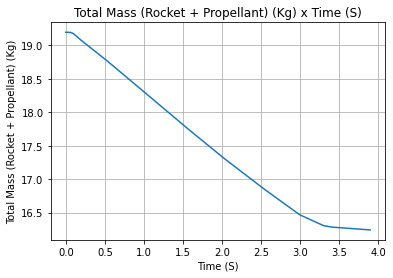

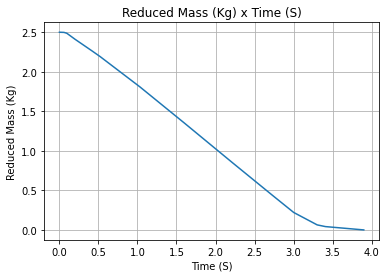


Aerodynamics Plots


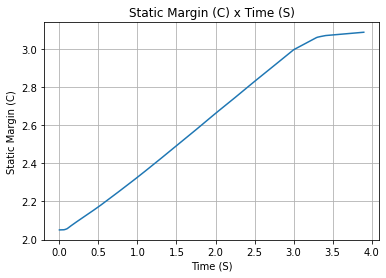

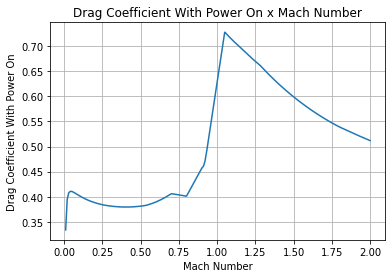

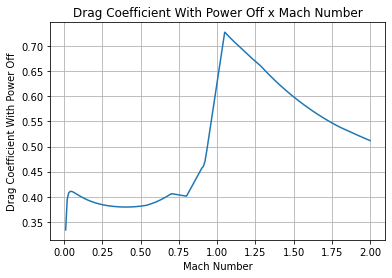

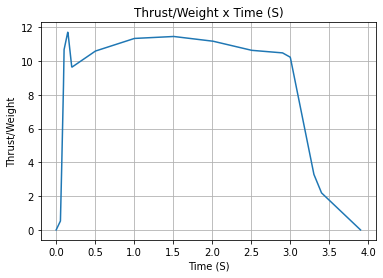

In [13]:
Calisto.allInfo()


### Simulate single flight

In [14]:
TestFlight = Flight(
    rocket=Calisto,
    environment=Env,
    inclination=84,
    heading=133,
)


In [15]:
n = NoseConeDataByNoseCone(nosecone=NoseCone)
n

NoseConeDataByNoseCone(length=(0.55829, 0), kind=[None], position=(1.278, 0), baseRadius=(0.0635, 0), rocketRadius=(0.0635, 0), name='NoseCone')

In [16]:
r = RocketData(
    # rocket=Calisto,
    radius = (1,'str'),
    mass = (10,1,'str'),
    # inertiaI = 1,
    inertiaZ = 1,
    powerOffDrag=["../../../data/calisto/powerOffDragCurve.csv"],
    powerOnDrag=["../../../data/calisto/powerOnDragCurve.csv"],
    powerOnDragFactor = (1,0.3),
    centerOfDryMassPosition = 1,
    coordinateSystemOrientation = ['lala']
)
r

RocketDataByRocket(radius=(0.0635, 1, 'str'), mass=(10, 1, 'str'), inertiaI=(6.6, 0), inertiaZ=(0.0351, 1), powerOffDrag=[WindowsPath('../../../data/calisto/powerOffDragCurve.csv')], powerOnDrag=[WindowsPath('../../../data/calisto/powerOnDragCurve.csv')], centerOfDryMassPosition=(0, 1), powerOffDragFactor=(1, 0), powerOnDragFactor=(1, 0.3))

In [20]:
r.nosecones

[NoseConeDataByNoseCone(length=(0.55829, 0), kind=[None], position=(1.278, 0), baseRadius=(0.0635, 0), rocketRadius=(0.0635, 0), name='NoseCone'),
 NoseConeDataByNoseCone(length=(0.55829, 0), kind=[None], position=(1.278, 0), baseRadius=(0.0635, 0), rocketRadius=(0.0635, 0), name='NoseCone')]

In [19]:
r.addNose(n)

In [ ]:
m = SolidMotorDataByMotor(
    solidMotor = Pro75M1670,
    thrustSource=["../../../data/motors/Cesaroni_M1670.eng",],
    burnOutTime=5,
    grainsCenterOfMassPosition=(-0.8,1),
    grainNumber=(5,1,'sd'),
    grainDensity=(1,1),
    grainOuterRadius=(1,1),
    grainInitialInnerRadius=(1,1),
    grainInitialHeight=(1,1),
    grainSeparation=(1,1),
    nozzleRadius=(1,1),
    nozzlePosition=(1,1),
    # throatRadius=(1),
    # totalImpulse=(1)
)
m

In [ ]:

e = EnvironmentDataByEnvironment(
    railLength=(4,'b'),
    # date=[(1,2,3,4)],
    elevation = (500),
    gravity = (1,'str'),
    latitude = (1), # TODO: maybe add even more restrictions to values such as these...
    longitude = (1),
    datum = ["SIRGAS2000"], # TODO: can add even more restriction to be just the acceptable strings
    timeZone = ["UTC"],
    environment=Env,)

In [ ]:
e

In [ ]:
import json
from rocketpy import AeroSurfaces

# use order to sort data structs of each class to sort the dict to look pretty


class DispersionDict(dict):

    def __init__(self, flight = None, rocket = None, motor = None, environment = None, dispersion = None):
        """Creates a standard dispersion dictionary. The dictionary should be in the 
        format used in the Dispersion class. If an object of a RocketPy class is passed
        the dictionary created should have its values as the nominal values"""

        if flight:
            self.add_flight_values(flight)
            self.add_rocket_values(flight.rocket)
            self.add_motor_values(flight.rocket.motor)
            self.add_env_values(flight.env)
        if rocket:
            self.add_rocket_values(rocket)
            self.add_motor_values(rocket.motor)
        if motor:
            self.add_motor_values(motor)
        if environment:
            self.add_env_values(environment)

    @staticmethod
    def empty_standard_dict():
        """returns and prints empty standard dispersion dictionary"""
        empty_standard_dict = {
            # Environment Parameters
            "railLength": (None, None),
            "date": [None],
            "elevation": (None, None),
            "gravity": (None, None),
            "latitude": (None, None),
            "longitude": (None, None),
            "timeZone": [None],
            # Solid Motor Parameters
            "burnOutTime": (None, None),
            "grainDensity": (None, None),
            "grainInitialHeight": (None, None),
            "grainInitialInnerRadius": (None, None),
            "grainNumber": [None],
            "grainOuterRadius": (None, None),
            "grainSeparation": (None, None),
            "nozzleRadius": (None, None),
            "throatRadius": (None, None),
            "thrustSource": [None],
            "totalImpulse": (None, None),
            "grainsCenterOfMassPosition": (None, None),
            # Rocket Parameters
            "mass": (None, None),
            "radius": (None, None),
            "inertiaI": (None, None),
            "inertiaZ": (None, None),
            "powerOffDrag":[None],
            "powerOnDrag":[None],
            "powerOffDragFactor": (None, None),
            "powerOnDragFactor": (None, None),
            "motor_position": (None, None),
            "nose_name_kind": [None],
            "nose_name_length": (None, None),
            "nose_name_position": (None, None),
            "finSet_name_n": [None],
            "finSet_name_rootChord": (None, None),
            "finSet_name_tipChord": (None, None),
            "finSet_name_span": (None, None),
            "finSet_name_position": (None, None),
            "finSet_name_airfoil": [None],
            "tail_name_topRadius": (None, None),
            "tail_name_bottomRadius": (None, None),
            "tail_name_length": (None, None),
            "tail_name_position": (None, None),
            "parachute_name_CdS": (None, None),
            "parachute_name_trigger": [None],
            "parachute_name_samplingRate": (None, None),
            "parachute_name_lag": (None, None),
            "parachute_name_noise": [None],
            # Flight Parameters
            "inclination": (None, None),
            "heading": (None, None),
        }
        return empty_standard_dict
    
    def complete_dict(self, dictionary):
        empty_standard_dict = self.empty_standard_dict()
        for key, value in empty_standard_dict.items:
            if key in dictionary.keys():


        return None


    def add_flight_values(self, flight):
        standard_flight = {
            "inclination": (None, None),
            "heading": (None, None),
        }
        for key in standard_flight.keys():
            self.__dict__[key] = (getattr(flight, key), None)
        return None
    
    def add_rocket_values(self, rocket):
        standard_rocket = {
            "mass": (None, None),
            "radius": (None, None),
            "inertiaI": (None, None),
            "inertiaZ": (None, None),
            "powerOffDrag":[None],
            "powerOnDrag":[None],
            "motorPosition": (None, None),
            }

        for key, value in standard_rocket.items():
            if isinstance(value, list):
                self.__dict__[key] = [getattr(rocket, key)]
            else:
                self.__dict__[key] = (getattr(rocket, key), None)

        for surface in rocket.aerodynamicSurfaces:
            if isinstance(surface[0], AeroSurfaces.NoseCone):
                self.__dict__[f"nose_{surface[0].name}_kind"] = [surface[0].kind]
                self.__dict__[f"nose_{surface[0].name}_lenght"] = (surface[0].length,None)
                self.__dict__[f"nose_{surface[0].name}_position"] = (surface[1],None)

            if isinstance(surface[0], AeroSurfaces.TrapezoidalFins):
                self.__dict__[f"finSet_{surface[0].name}_n"] = [surface[0].n]
                self.__dict__[f"finSet_{surface[0].name}_rootChord"] = (surface[0].rootChord,None)
                self.__dict__[f"finSet_{surface[0].name}_tipChord"] = (surface[0].tipChord,None)
                self.__dict__[f"finSet_{surface[0].name}_span"] = (surface[0].span,None)
                self.__dict__[f"finSet_{surface[0].name}_cantAngle"] = (surface[0].cantAngle,None)
                self.__dict__[f"finSet_{surface[0].name}_sweepLength"] = (surface[0].sweepLength,None)
                self.__dict__[f"finSet_{surface[0].name}_sweepAngle"] = (surface[0].sweepAngle,None)
                self.__dict__[f"finSet_{surface[0].name}_airfoil"] = [surface[0].airfoil]
                self.__dict__[f"finSet_{surface[0].name}_position"] = (surface[1],None)

            if isinstance(surface[0], AeroSurfaces.Tail):
                self.__dict__[f"tail_{surface[0].name}_topRadius"] = (surface[0].topRadius,None)
                self.__dict__[f"tail_{surface[0].name}_bottomRadius"] = (surface[0].bottomRadius,None)
                self.__dict__[f"tail_{surface[0].name}_length"] = (surface[0].length,None)
                self.__dict__[f"tail_{surface[0].name}_position"] = (surface[1],None)

        for chute in rocket.parachutes:
            self.__dict__[f"parachute_{chute.name}_CdS"] = (chute.CdS,None)
            self.__dict__[f"parachute_{chute.name}_trigger"] = [chute.trigger]
            self.__dict__[f"parachute_{chute.name}_samplingRate"] = (chute.samplingRate,None)
            self.__dict__[f"parachute_{chute.name}_lag"] = (chute.lag, None)
            self.__dict__[f"parachute_{chute.name}_noise"] = [chute.noise]

        self.__dict__["powerOffDragFactor"] = (1, None)
        self.__dict__["powerOnDragFactor"] = (1, None)
        return None
    
    def add_motor_values(self, motor):
        standard_motor = {
            "burnOutTime": (None, None),
            "grainDensity": (None, None),
            "grainInitialHeight": (None, None),
            "grainInitialInnerRadius": (None, None),
            "grainNumber": [None],
            "grainOuterRadius": (None, None),
            "grainSeparation": (None, None),
            "nozzleRadius": (None, None),
            "throatRadius": (None, None),
            "thrustSource": [None],
            "totalImpulse": (None, None),
            "grainsCenterOfMassPosition": (None, None),
        }
        for key, value in standard_motor.items():
            if isinstance(value, list):
                self.__dict__[key] = [getattr(motor, key)]
            else:
                self.__dict__[key] = (getattr(motor, key), None)
        return None
    
    def add_env_values(self, env):
        standard_env = {
            "railLength": (None, None),
            "date": [None],
            "elevation": (None, None),
            "gravity": (None, None),
            "latitude": (None, None),
            "longitude": (None, None),
            "timeZone": [None],
        }
        for key, value in standard_env.items():
            if isinstance(value, list):
                self.__dict__[key] = [getattr(env, key)]
            else:
                self.__dict__[key] = (getattr(env, key), None)
        return None

    # Dictionary methods
    # These methods make sure the class work just
    # The same as a normal dict

    def __setitem__(self, key, item):
        self.__dict__[key] = item

    def __getitem__(self, key):
        return self.__dict__[key]

    def __repr__(self):
        indent = 4
        rep = '{\n'
        for key, value in self.__dict__.items():
            rep = rep + ' ' * indent + str(key) + ' : ' + str(value) + ',\n'
        rep = rep + '}'
        return rep
    
    def __len__(self):
        return len(self.__dict__)

    def __delitem__(self, key):
        del self.__dict__[key]

    def clear(self):
        return self.__dict__.clear()

    def copy(self):
        return self.__dict__.copy()

    def has_key(self, k):
        return k in self.__dict__

    def update(self, *args, **kwargs):
        return self.__dict__.update(*args, **kwargs)

    def keys(self):
        return self.__dict__.keys()

    def values(self):
        return self.__dict__.values()

    def items(self):
        return self.__dict__.items()

    def pop(self, *args):
        return self.__dict__.pop(*args)

    def __cmp__(self, dict_):
        return self.__cmp__(self.__dict__, dict_)

    def __contains__(self, item):
        return item in self.__dict__

    def __iter__(self):
        return iter(self.__dict__)

    def __unicode__(self):
        return unicode(repr(self.__dict__))




And we can visualize the flight trajectory:

In [ ]:
TestFlight.plots.trajectory_3d()


### Starting the Monte Carlo Simulations

First, let's invoke the Dispersion class, we only need a filename to initialize it.
The filename will be used either to save the results of the simulations or to load them
from a previous ran simulation.

In [ ]:
TestDispersion = Dispersion(filename="dispersion_analysis_outputs/disp_class_example")


Then, we can run the simulations using the method Dispersion.run_dispersion().
But before that, we need to set some simple parameters for the simulations.
We will set them by using a dictionary, which is one of the simplest way to do it.

In [ ]:
#TODO: explain that this is std only
disp_dictionary = {
    # Solid Motor Parameters
    "burnOutTime": 0.2,
    "totalImpulse": 0.033 * Pro75M1670.totalImpulse,
    "motor_position": (-1.255,0),
    # Rocket Parameters
    "mass": 0.100,
    "radius": 0.001,
    "powerOffDrag": 0.033,  # Multiplier
    "powerOnDrag": 0.033,  # Multiplier
    "parachute_Main_CdS": 1,
    "parachute_Drogue_CdS": 0.1,
    "parachute_Main_lag": 0.1,
    "parachute_Drogue_lag": 0.1,
    # Flight Parameters
    "inclination": 1,
    "heading": 2,
}


Finally, let's iterate over the simulations and export the data from each flight simulation!

In [ ]:
TestDispersion.run_dispersion(
    number_of_simulations=50,
    dispersion_dictionary=disp_dictionary,
    rocket=Calisto,
    append=False,
)


### Visualizing the results

Now we finally have the results of our Monte Carlo simulations loaded!
Let's play with them.

First, we can print numerical information regarding the results of the simulations.

In [ ]:
TestDispersion.import_results()


In [ ]:
TestDispersion.print_results()


Also, we can visualize histograms of such results

In [ ]:
TestDispersion.allInfo()


Export to kml so it can be visualized in Google Earth

In [ ]:
TestDispersion.exportEllipsesToKML(
    filename="dispersion_analysis_outputs/disp_class_example.kml",
    origin_lat=Env.latitude,
    origin_lon=Env.longitude,
    type="impact",
)


## 2nd Option -> Running by using only a dictionary of parameters

This second option allow us to perform the Monte Carlo Simulations without the need of a Flight object. This is useful when we want to perform the simulations for a rocket that we don't have a Flight object for, or when we want to perform the simulations for a rocket that we have a Flight object for, but we want to change some parameters of the simulations.

In [ ]:
TestDispersion2 = Dispersion(filename="dispersion_analysis_outputs/disp_class_example2")


In [ ]:
aerodynamic_surfaces = Calisto.aerodynamicSurfaces
nose, fins, tail = aerodynamic_surfaces


In [ ]:
dispersion_dictionary2 = {
    # Environment Parameters
    "railLength": (Env.railLength, 0.001),
    "date": [Env.date],
    "datum": ["WSG84"],
    "elevation": (Env.elevation, 10),
    "gravity": (Env.gravity, 0),
    "latitude": (Env.latitude, 0),
    "longitude": (Env.longitude, 0),
    "timeZone": [str(Env.timeZone)],
    # Solid Motor Parameters
    "burnOutTime": (Pro75M1670.burnOutTime, 0.2),
    "grainDensity": (Pro75M1670.grainDensity, 0.1 * Pro75M1670.grainDensity),
    "grainInitialHeight": (Pro75M1670.grainInitialHeight, 0.001),
    "grainInitialInnerRadius": (Pro75M1670.grainInitialInnerRadius, 0.001),
    "grainNumber": [Pro75M1670.grainNumber],
    "grainOuterRadius": (Pro75M1670.grainOuterRadius, 0.001),
    "grainSeparation": (Pro75M1670.grainSeparation, 0.001),
    "nozzleRadius": (Pro75M1670.nozzleRadius, 0.001),
    "throatRadius": (Pro75M1670.throatRadius, 0.001),
    "thrustSource": [Pro75M1670.thrustSource],
    "totalImpulse": (Pro75M1670.totalImpulse, 0.033 * Pro75M1670.totalImpulse),
    "grainsCenterOfMassPosition": (Pro75M1670.grainsCenterOfMassPosition, 0.001),
    # Rocket Parameters
    "mass": (Calisto.mass, 0.100),
    "radius": (Calisto.radius, 0.001),
    "inertiaI": (Calisto.inertiaI, Calisto.inertiaI * 0.1),
    "inertiaZ": (Calisto.inertiaZ, Calisto.inertiaZ * 0.1),
    "powerOffDrag":["../../../data/calisto/powerOffDragCurve.csv"],
    "powerOnDrag":["../../../data/calisto/powerOnDragCurve.csv"],
    "powerOffDragFactor": (1, 0.033),
    "powerOnDragFactor": (1, 0.033),
    "motor_position": (Calisto.motorPosition, 0.001),
    "nose_name_kind": [nose[0].kind],
    "nose_name_length": (nose[0].length, 0.001),
    "nose_name_position": (nose[1], 0.001),
    "finSet_name_n": [fins[0].n],
    "finSet_name_rootChord": (fins[0].rootChord, 0.001),
    "finSet_name_tipChord": (fins[0].tipChord, 0.001),
    "finSet_name_span": (fins[0].span, 0.001),
    "finSet_name_position": (fins[1], 0.001),
    "finSet_name_airfoil": [fins[0].airfoil],
    "tail_name_topRadius": (tail[0].topRadius, 0.001),
    "tail_name_bottomRadius": (tail[0].bottomRadius, 0.001),
    "tail_name_length": (tail[0].length, 0.001),
    "tail_name_position": (tail[1], 0.001),
    "parachute_Main_CdS": (10,2),
    "parachute_Main_trigger": mainTrigger,
    "parachute_Main_samplingRate": (105,0),
    "parachute_Main_lag": (1.5,0),
    "parachute_Main_noise": [(0,8.3,0.5)],
    "parachute_Drogue_CdS": (1,0.3),
    "parachute_Drogue_trigger": drogueTrigger,
    "parachute_Drogue_samplingRate": (105,0),
    "parachute_Drogue_lag": (1.5,0),
    "parachute_Drogue_noise": [(0,8.3,0.5)],
    # Flight Parameters
    "inclination": (85,1),
    "heading": (90,2),
}

In [ ]:
TestDispersion2.run_dispersion(
    number_of_simulations=50,
    dispersion_dictionary=dispersion_dictionary2,
)


In [ ]:
TestDispersion2.import_results()


And finally, we can export the ellipses of the results to a .kml file so it can be opened on Google Earth

In [ ]:
TestDispersion2.print_results()


In [ ]:
TestDispersion2.allInfo()
